In [1]:
print("hey")

hey


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [18]:
import os 

In this project we will use the CIFAR-10 dataset to create a Image Predicting Neural Network using Tensorflow.
The original one batch data is a **(10000 x 3072) matrix** expressed in numpy array.
First we have to manipulate the data to a format that fits our purpose. 
the <b><i>10000*3072</i></b> means, that the original dataset contains <i>10000</i> entries  
<br>
We want to transform this data into a <b>32*32</b> vector which can be displayed as an image.
We will the NumPy functions <b>reshape </b> and <b>transpose </b> to achieve this
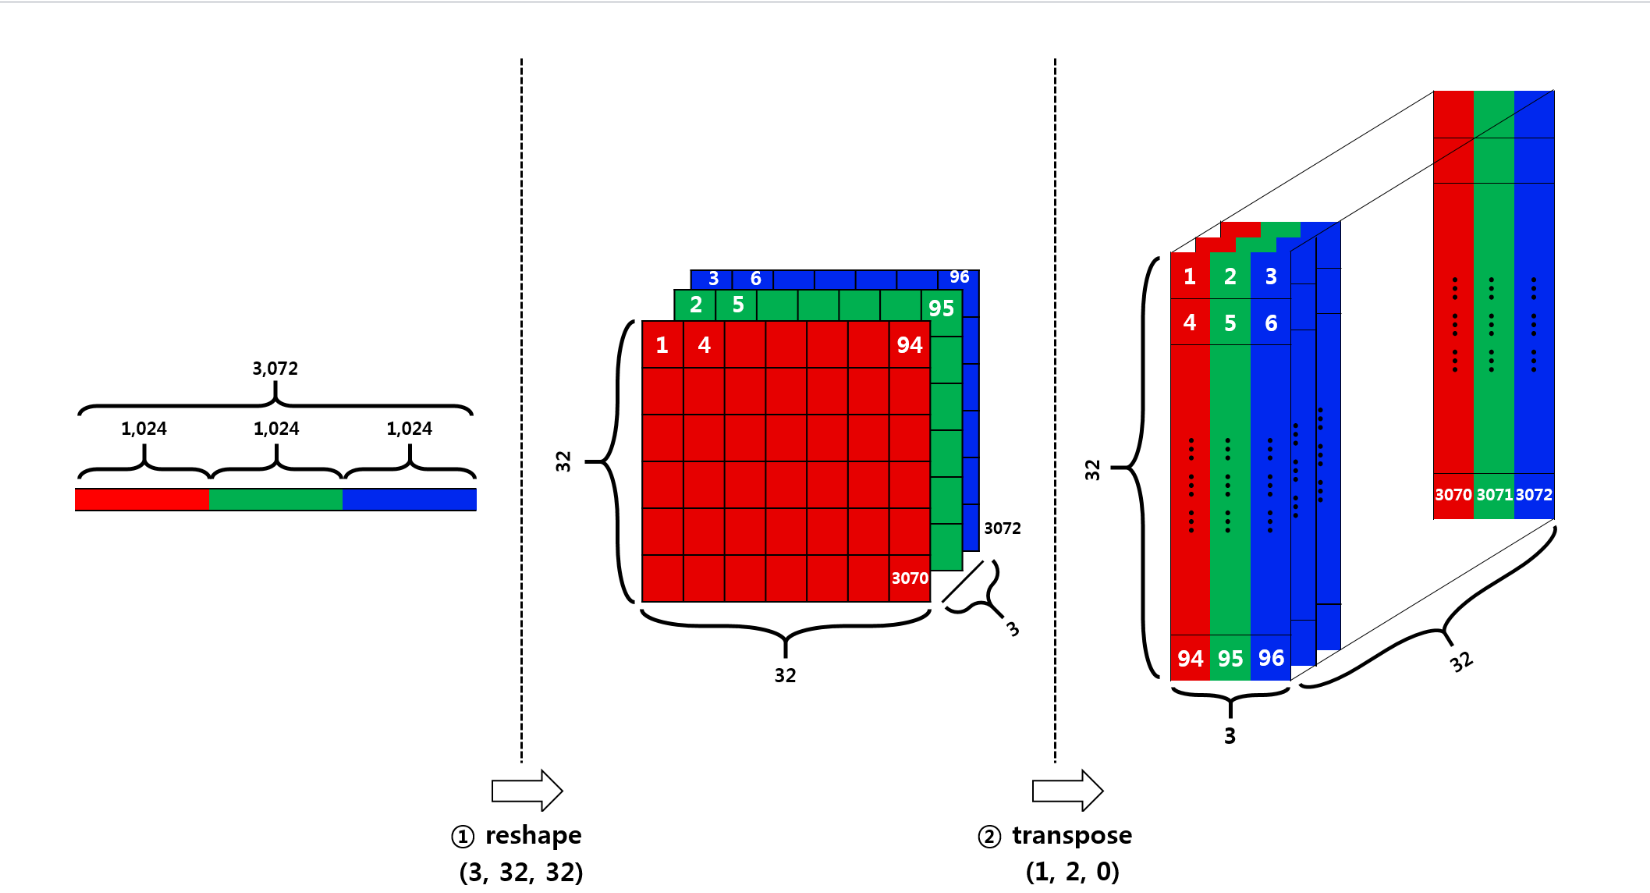

In [19]:
import os
import pickle
os.listdir()

['.ipynb_checkpoints',
 'Cifar10!.ipynb',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'preprocess_batch_1.p',
 'preprocess_batch_2.p',
 'preprocess_batch_3.p',
 'preprocess_batch_4.p',
 'preprocess_batch_5.p',
 'preprocess_training.p',
 'preprocess_validation.p',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [20]:
#load dataset functions


def load_cifar_dataset(batch_id, path=""):
    with open(f'{path}data_batch_{str(batch_id)}', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
        
    print('loaded successfully')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [21]:
for i in range(1, 5+1):
    features, labels = load_cifar_dataset(i, path="./")
    print(labels)

loaded successfully
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6

loaded successfully
[1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8, 2, 7, 0, 4, 1, 7, 7, 4, 4, 9, 9, 6, 2, 4, 1, 6, 4, 9, 6, 6, 9, 6, 9, 9, 5, 7, 1, 6, 8, 2, 9, 5, 9, 5, 3, 7, 1, 3, 3, 9, 1, 7, 8, 9, 7, 4, 3, 4, 9, 5, 8, 4, 9, 3, 6, 1, 1, 4, 3, 9, 9, 1, 9, 9, 2, 4, 3, 2, 4, 7, 1, 5, 1, 8, 6, 3, 6, 3, 4, 4, 9, 9, 9, 7, 0, 5, 7, 7, 4, 8, 8, 4, 2, 0, 5, 2, 4, 9, 1, 7, 7, 4, 8, 8, 8, 0, 2, 3, 6, 3, 9, 0, 8, 2, 2, 4, 8, 8, 1, 8, 5, 7, 6, 0, 9, 1, 4, 8, 2, 1, 0, 5, 1, 6, 5, 3, 4, 9, 9, 0, 3, 5, 4, 2, 6, 3, 9, 4, 9, 8, 6, 4, 1, 1, 9, 8, 2, 2, 1, 8, 5, 9, 7, 8, 1, 1, 4, 2, 4, 2, 0, 8, 8, 0, 0, 4, 3, 0, 7, 7, 6, 1, 6, 7, 1, 5, 6, 1, 7, 2, 4, 0, 2, 2, 5, 9, 3, 2, 1, 4, 1, 2, 9, 8, 5, 2, 3, 3, 4, 9, 7, 2, 3, 9, 7, 6, 2, 9, 7, 5, 4, 0, 8, 7, 2, 0, 3, 5, 1, 3, 1, 7, 8, 7, 9, 8, 2, 9, 1, 4, 8, 6, 7, 3, 6, 9, 7, 9, 4, 5, 8, 0, 5, 6, 6, 0, 8, 4, 6, 1, 4, 2, 2, 1, 8, 4, 4, 0, 2, 4, 1, 9, 8, 9, 0, 7, 1, 1, 6, 4, 7, 4, 6, 9, 3, 2, 7, 3, 7, 4, 5, 1, 9, 6, 3, 9, 6, 0, 7, 0, 0, 0, 6, 6, 9, 7, 3

In [22]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [23]:
def display_stats(path, batch_id, sample_id):
    if batch_id > 5:
        return f"batch_id {batch_id} out of range"
    features, labels = load_cifar_dataset(batch_id, path=path)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))

    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))


In [24]:
display_stats('./', 5, 12)

loaded successfully

Stats of batch #5:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1014
Label Counts of [1](AUTOMOBILE) : 1014
Label Counts of [2](BIRD) : 952
Label Counts of [3](CAT) : 1016
Label Counts of [4](DEER) : 997
Label Counts of [5](DOG) : 1025
Label Counts of [6](FROG) : 980
Label Counts of [7](HORSE) : 977
Label Counts of [8](SHIP) : 1003
Label Counts of [9](TRUCK) : 1022

Example of Image 12:
Image - Min Value: 47 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


For <b>Preprocessing </b> we are going to use the Mix-Max algorithm, which is wrapped in a function, that taks <b> x </b> as a parameter and returns it as a normalized NumPy Array.
<b>x</b> can be anything, and it can be N-dimensional array. In this story, it will be 3-D array for an image.
<br>
Min-Max Normalization <b>(y = (x-min) / (max-min))</b> technique is used, but there are other options too. By applying Min-Max normalization, the original image data is going to be transformed in range of 0 to 1 (inclusive). A simple answer to why normalization should be performed is somewhat related to activation functions.

In [25]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

Using the <b>Min Max </b> normalizing function it makes it easier for us to use an activation function like <b>Sigmoid </b> which goes from <b>0 to 1 </b> afterwards.
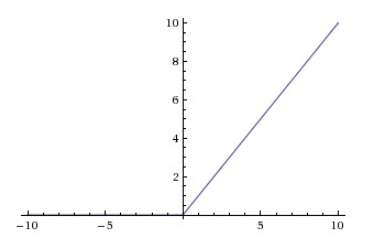

Another example could be the ReLu activation function, which goes from <b>0 to Infinity </b>
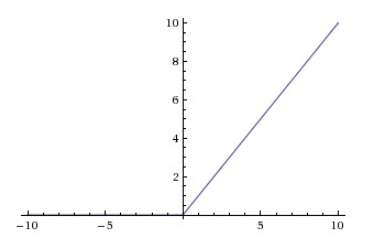

In [26]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [27]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(normalize, one_hot_encode, path="./"):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cifar_dataset(batch_i, path=path)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open('./data_batch_2', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [28]:
preprocess_and_save_data(normalize, one_hot_encode)

loaded successfully
loaded successfully
loaded successfully
loaded successfully
loaded successfully


Tensorflow workflow: 
Most TensorFlow programs start with a dataflow graph construction phase. In this phase, you invoke TensorFlow API functions that construct new tf.Operation <b>(node)</b> and tf.Tensor <b>(edge)</b> objects and add them to a tf.Graph instance. TensorFlow provides a default graph that is an implicit argument to all API functions in the same context.
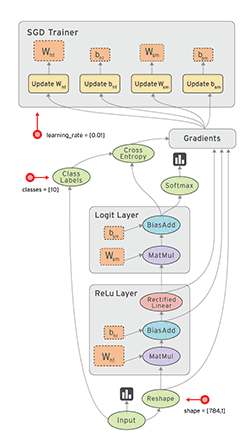

In [52]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [53]:
from tensorflow.python.framework import ops
ops.reset_default_graph()


In [54]:
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x')
y =  tf.placeholder(tf.float32, shape=(None, 10), name='output_y')

<b>keep_prob</b> is a single number in what probability how many units of each layer should be kept. This is known as <b>Dropout technique</b>.

In [55]:
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [59]:
import tensorflow as tf

def conv_net(x, keep_prob):
    conv1_filter = tf.Variable(tf.random.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.random.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.random.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.random.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.keras.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full4, num_outputs=10, activation_fn=None)
    return out

In [60]:
epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [61]:
logits = conv_net(x, keep_prob)

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

AttributeError: module 'tensorflow.keras.layers' has no attribute 'batch_normalization'